## Grand Challenge: RAVIR 
### Pipeline for binary classification. Basic UNET
#### Jonas Stylbäck & Miranda Gisudden

In [1]:
# External modules
%matplotlib inline
import sys
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input

# Local modules
sys.path.append("/tf/ravir-challenge/") # Root path, change accordingly
from utils import *
from models import *

In [2]:
# Data parameters
train_dir = '/tf/ravir-challenge/dataset/train'
test_dir = '/tf/ravir-challenge/dataset/test'
img_w, img_h, img_c = 768, 768, 1
batch_size = 1
val_ratio = 0.3

# Model parameters
base = 8
optimizer = Adam
learning_rate = 1e-4
epochs = 150
metric = [dice_coef]
loss_func = dice_coef_loss

In [3]:
# Read data
image_list = get_file_list(train_dir, 'training_images')
mask_list = get_file_list(train_dir, 'training_masks')


Shape and Unique values of image :
 (768, 768, 1) 
 [0.         0.00784314 0.01176471 0.01568628 0.01960784 0.02352941
 0.02745098 0.03137255 0.03529412 0.03921569 0.04705882 0.05490196
 0.06666667 0.07058824 0.07450981 0.07843138 0.08235294 0.08627451
 0.09019608 0.09411765 0.09803922 0.10196079 0.10588235 0.10980392
 0.11372549 0.11764706 0.12156863 0.1254902  0.12941177 0.13333334
 0.13725491 0.14117648 0.14509805 0.14901961 0.15294118 0.15686275
 0.16078432 0.16470589 0.16862746 0.17254902 0.1764706  0.18039216
 0.18431373 0.1882353  0.19215687 0.19607843 0.2        0.20392157
 0.20784314 0.21176471 0.21568628 0.21960784 0.22352941 0.22745098
 0.23137255 0.23529412 0.23921569 0.24313726 0.24705882 0.2509804
 0.25490198 0.25882354 0.2627451  0.26666668 0.27058825 0.27450982
 0.2784314  0.28235295 0.28627452 0.2901961  0.29411766 0.29803923
 0.3019608  0.30588236 0.30980393 0.3137255  0.31764707 0.32156864
 0.3254902  0.32941177 0.33333334 0.3372549  0.34117648 0.34509805
 0.3490196

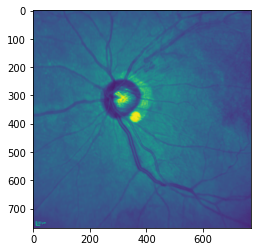


Shape and Unique values of mask :
 (768, 768, 1) 
 [0. 1.]


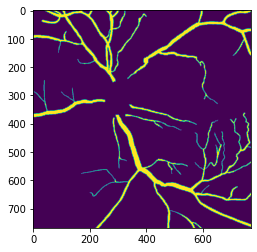

In [4]:
# Load train data
train_image_list, train_mask_list, val_image_list, val_mask_list \
= get_train_val_lists(image_list, mask_list, val_ratio)

x_train = load_as_binary(train_image_list, img_w, img_h, img_c, 'image')
y_train = load_as_binary(train_mask_list, img_w, img_h, img_c, 'mask')

x_val = load_as_binary(val_image_list, img_w, img_h, img_c, 'image')
y_val = load_as_binary(val_mask_list, img_w, img_h, img_c, 'mask')

# Debugging information
get_image_information(x_train, img_w, img_h, 'image', loaded = True)
get_image_information(y_train, img_w, img_h, 'mask', loaded = True)

In [5]:
# Load model
model = get_unet_BI(base, img_w, img_h, img_c)
model_compile = model.compile(optimizer = optimizer(learning_rate = learning_rate), loss = loss_func, metrics = metric)

Model: "Basic_UNET"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_layer (InputLayer)       [(None, 768, 768, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 768, 768, 8)  80          ['input_layer[0][0]']            
                                                                                                  
 conv2d_1 (Conv2D)              (None, 768, 768, 8)  584         ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 384, 384, 8)  0           ['conv2d_1[0][0]']      

In [6]:
# Train model
steps_per_epoch = x_train.shape[0]//batch_size

model_history = model.fit(
            x_train, y_train, batch_size = batch_size,
            epochs = epochs, validation_data = (x_val, y_val))

Epoch 1/150
17/17 [==============================] - 4s 54ms/step - loss: -0.1279 - dice_coef: 0.1279 - val_loss: -0.0011 - val_dice_coef: 0.0011
Epoch 2/150
17/17 [==============================] - 0s 28ms/step - loss: -0.1283 - dice_coef: 0.1283 - val_loss: -0.0011 - val_dice_coef: 0.0011
Epoch 3/150
17/17 [==============================] - 0s 28ms/step - loss: -0.1288 - dice_coef: 0.1288 - val_loss: -0.0011 - val_dice_coef: 0.0011
Epoch 4/150
17/17 [==============================] - 0s 28ms/step - loss: -0.1295 - dice_coef: 0.1295 - val_loss: -0.0011 - val_dice_coef: 0.0011
Epoch 5/150
17/17 [==============================] - 0s 29ms/step - loss: -0.1305 - dice_coef: 0.1305 - val_loss: -0.0011 - val_dice_coef: 0.0011
Epoch 6/150
17/17 [==============================] - 0s 28ms/step - loss: -0.1324 - dice_coef: 0.1324 - val_loss: -0.0012 - val_dice_coef: 0.0012
Epoch 7/150
17/17 [==============================] - 0s 29ms/step - loss: -0.1367 - dice_coef: 0.1367 - val_loss: -0.0012 - 

17/17 [==============================] - 0s 29ms/step - loss: -0.6685 - dice_coef: 0.6685 - val_loss: -9.0905e-04 - val_dice_coef: 9.0905e-04
Epoch 109/150
17/17 [==============================] - 1s 30ms/step - loss: -0.6691 - dice_coef: 0.6691 - val_loss: -1.0717e-04 - val_dice_coef: 1.0717e-04
Epoch 110/150
17/17 [==============================] - 0s 29ms/step - loss: -0.6686 - dice_coef: 0.6686 - val_loss: -1.1537e-04 - val_dice_coef: 1.1537e-04
Epoch 111/150
17/17 [==============================] - 0s 29ms/step - loss: -0.6682 - dice_coef: 0.6682 - val_loss: -5.9237e-04 - val_dice_coef: 5.9237e-04
Epoch 112/150
17/17 [==============================] - 0s 29ms/step - loss: -0.6783 - dice_coef: 0.6783 - val_loss: -5.3607e-04 - val_dice_coef: 5.3607e-04
Epoch 113/150
17/17 [==============================] - 0s 29ms/step - loss: -0.6782 - dice_coef: 0.6782 - val_loss: -1.8707e-04 - val_dice_coef: 1.8707e-04
Epoch 114/150
17/17 [==============================] - 0s 29ms/step - loss: -0

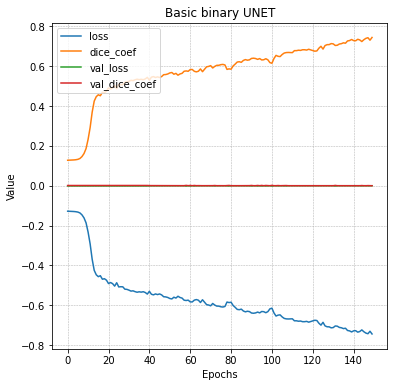

In [7]:
# Plot parameters
size_x = 6
size_y = 6
title = 'Basic binary UNET'
x_label = 'Epochs'
y_label = 'Value'
legend = True
print_keys = False

# Line plot of model history
plot_model_history(size_x, size_y, title, x_label, y_label, legend, print_keys, model_history)

1/1 [==============================] - 1s 1s/step

Shape and Unique values of prediction :
 (768, 768, 1) 
 [0.0000000e+00 1.1757059e-38 1.1765225e-38 ... 9.9999976e-01 9.9999988e-01
 1.0000000e+00]


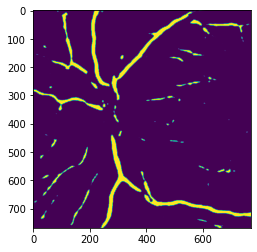

In [8]:
# Read and load test images for prediction
test_image_list = get_file_list(test_dir, '')
x_test = load_as_binary(test_image_list, img_w, img_h, img_c, 'image')

# Predict test images
predicted_mask_list = model.predict(x_test)

# Debugging information
get_image_information(predicted_mask_list, img_w, img_h, 'prediction', loaded = True)

1  out of  19  converted
2  out of  19  converted
3  out of  19  converted
4  out of  19  converted
5  out of  19  converted
6  out of  19  converted
7  out of  19  converted
8  out of  19  converted
9  out of  19  converted
10  out of  19  converted
11  out of  19  converted
12  out of  19  converted
13  out of  19  converted
14  out of  19  converted
15  out of  19  converted
16  out of  19  converted
17  out of  19  converted
18  out of  19  converted
19  out of  19  converted

Shape and Unique values of prediction mask :
 (768, 768) 
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 

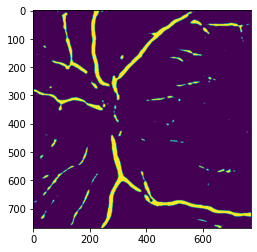

In [9]:
# Save predicted images to folder
save_binary_predictions(predicted_mask_list[0:len(predicted_mask_list)])

# Debugging information
prediction_list = get_file_list('/tf/ravir-challenge/predictions', '')
get_image_information(prediction_list, img_w, img_h, 'prediction mask', loaded = False)